# __Hospitality__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Hospitality is divided into _five_ subcategories: 

# __1. Check-in:__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Hospitality/check-in.csv")
df.head()

,text,sentiment
0,bangalore airport is the best airport ive been...,Positive
1,yatra was supposed to reduce time apparently r...,Positive
2,i entered 2 hours before departure thats 120 ...,Positive
3,had some issue checking in online but prajawa...,Positive
4,my house in bangalore to my parents house in...,Positive


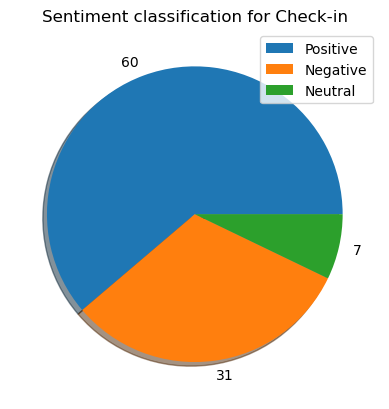

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
checkin_count = val.values

#Plotting a pie chart
plt.pie(checkin_count, labels = checkin_count, shadow= True)
plt.title("Sentiment classification for Check-in")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding Check-in:

### Topic Modelling

In [4]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = ["yatra","digi","hour","15","havent","salem"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: team, checks, dont, necessary, know, checkin, best, counter, check, security
Topic 2: check, checkin, boarding, time, process, blrairport, security, away, best, india
Topic 3: security, boarding, checkin, check, experience, just, flight, gate, times, pass
Topic 4: security, check, flight, mumbai, luggage, mins, hand, ticket, delhi, international
Topic 5: check, digiyatra, flight, security, took, extremely, today, service, app, counters
Topic 6: checkin, best, counter, check, security, digiyatra, india, service, time, team
Topic 7: terminal, lost, check, laptop, support, request, security, t2, checkin, pass
Topic 8: check, counter, toll, pay, id, queue, closed, priority, card, long
Topic 9: luggage, digiyatra, check, pay, 1100, inr, queue, went, reaching, number
Topic 10: checkin, experience, help, staff, baggage, smooth, helpful, amp, just, check


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

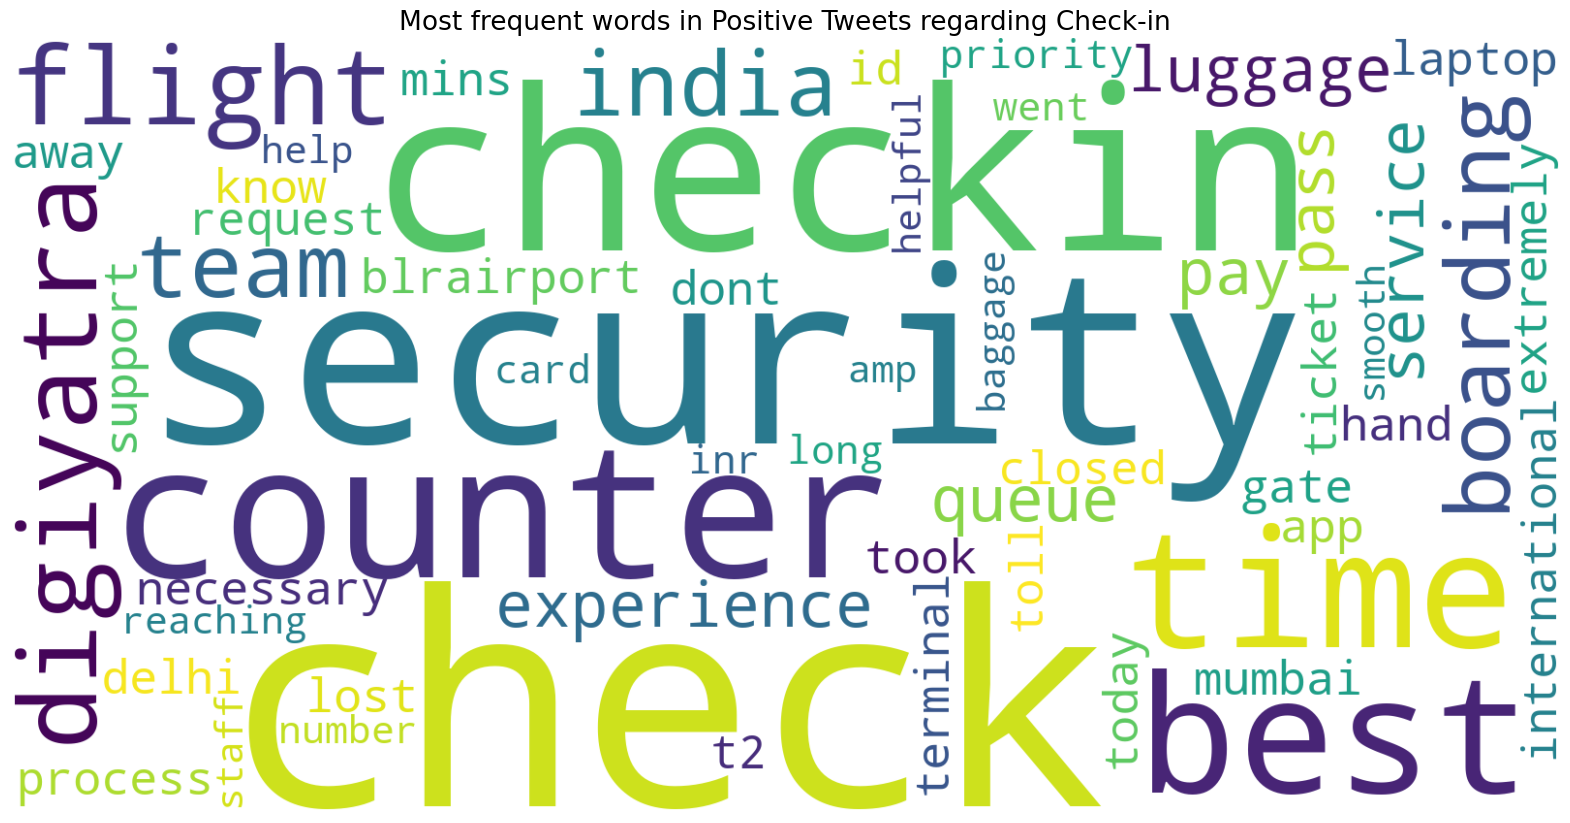

In [5]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Check-in', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Check-in
#### 1. DIgi Yatra is praised as it prevents unwanted queues during check-in
#### 2. Security and staff are thorough with their jobs
#### 3. Hassle-free check-in and security within 5-7 minutes

## b.Topic modelling and wordcloud for negative tweets regarding Check-in:

### Topic Modelling

In [6]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = ["sanon","priority","excess","despite","cabin"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 7
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: baggage, claim, counter, airline, boarding, akasaair, pathetic, print, pass, dont
Topic 2: staff, check, rude, amp, chennai, airvistara, instead, technology, unacceptable, sent
Topic 3: bag, luggage, checkin, check, people, akasa, air, queue, boarding, making
Topic 4: check, counter, flight, baggage, akasaair, indigo, big, lost, checkin, staff
Topic 5: check, staff, inside, service, que, wait, good, buy, dont, stuck
Topic 6: dont, check, stuck, left, staff, disappointing, counter, security, passengers, bag
Topic 7: checkin, staff, counter, experience, amp, counters, ticket, airvistara, tickets, bad


### Word Cloud

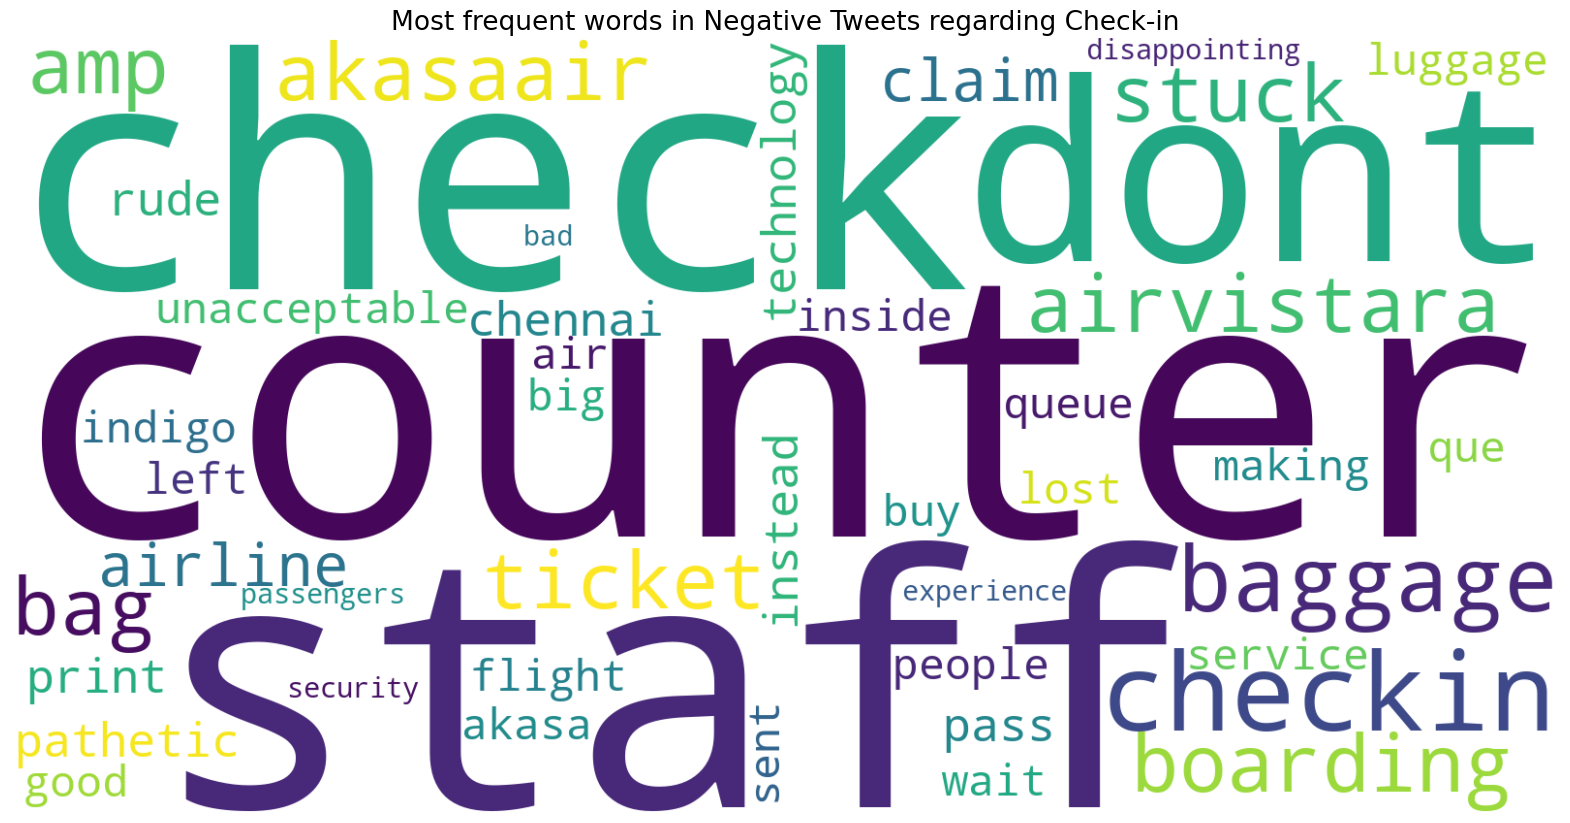

In [7]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800, background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Check-in', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Check-in
#### 1. Akasa Air facing constant issues with boarding due to problem with server
#### 2. Travellers complain about incorrect excess baggage charges
#### 3. Instances of the staff not being cooperative are noted